## Import Package

In [ ]:
import cv2
import numpy as np
from skimage import color
import matplotlib.pyplot as plt

from google.colab import files
image = files.upload()

Saving cutest-baby-animals-11.jpg to cutest-baby-animals-11.jpg


## Konversi RGB ke CIELAB

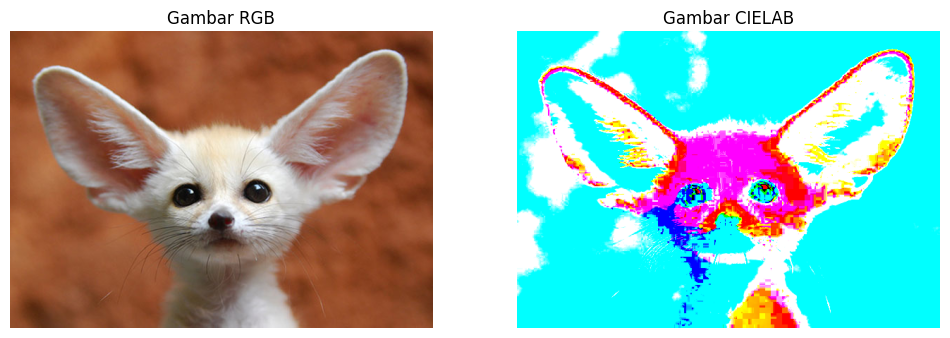

In [ ]:
# Langkah Konversi RGB to CIELAB:
# 1. Konversi RGB ke ruang warna XYZ menggunakan matriks transformasi
# 2. Konversi gambar pada runag warna XYZ ke ruang warna L*A*B

# Langkah 1
def rgb_to_xyz(img):

    # Matriks transformasi (baris x kolom)
    matrix = np.array([
        [0.4124564, 0.3575761, 0.1804375],
        [0.2126729, 0.7151522, 0.0721750],
        [0.0193339, 0.1191920, 0.9503041]
    ])

    # Apapun yang dikalikan dengan matriks transformasi, harus berbentuk vektor baris (baris x kolom)
    # Untuk melakukan transformasi dengan matrix-multiplication,
    # matriks harus berbentuk vektor kolom (kolom x baris)
    # Oleh karena itu, matriks transformasi harus di transpose terlebih dahulu
    xyz = np.dot(img, matrix.T)
    return xyz

# Langkah 2
def xyz_to_lab(xyz):
    # Normalisasi nilai XYZ dengan white reference (Xo, Yo, Zo)
    ref_white = np.array([242.36628, 255.0, 277.63227])

    # Pembagian elemen per elemen sepanjang dimensi terakhir dari xyz
    # dengan elemen yang sesuai dari ref_white
    xyz = xyz / ref_white # Dimensi xyz -> (height, width, 3)

    # Fungsi f(w)
    def f(w):
        delta = 0.008856
        return np.where(w > delta, w**(1/3), 7.787 * w + 0.1379)

    # Perhitungan f(X/Xo), f(Y/Yo), f(Z/Zo)
    fx = f(xyz[..., 0]) # f(X/Xo)
    fy = f(xyz[..., 1]) # f(Y/Yo)
    fz = f(xyz[..., 2]) # f(Z/Zo)

    # Perhitungan L*, a*, b*
    Y = xyz[..., 1] # Y/Yo
    L = np.where(Y > 0.008856, 116 * (Y)**1/3 - 16, 903.3 * Y)

    a = 500 * (fx - fy)
    b = 200 * (fy - fz)

    lab = np.stack([L, a, b], axis=-1)
    return lab

def rgb_to_lab(img):
    xyz = rgb_to_xyz(img)
    lab = xyz_to_lab(xyz)
    return lab

img_rgb = cv2.imread('cutest-baby-animals-11.jpg') # Dimensi img -> (height, width, 3)
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)

img_lab = rgb_to_lab(img_rgb)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Gambar RGB")
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Gambar CIELAB")
plt.imshow(img_lab)
plt.axis('off')

plt.show()